In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def science_plot(fontsize = 10):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

In [3]:
aggregate_path = r'aggregate.csv'
aggregate_file = pd.read_csv(aggregate_path)
print(aggregate_file)

       n_values  step_vals  r_max_vals
0             0          0           1
1            10        173           4
2            20        442           7
3            30        459          12
4            40        902          20
...         ...        ...         ...
29911      3995    1233568         442
29912      3996    1233873         442
29913      3997    1235412         442
29914      3998    1235769         443
29915      3999    1236022         443

[29916 rows x 3 columns]


c:\Users\verci\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1.5851623944072637 0.12756603037534672


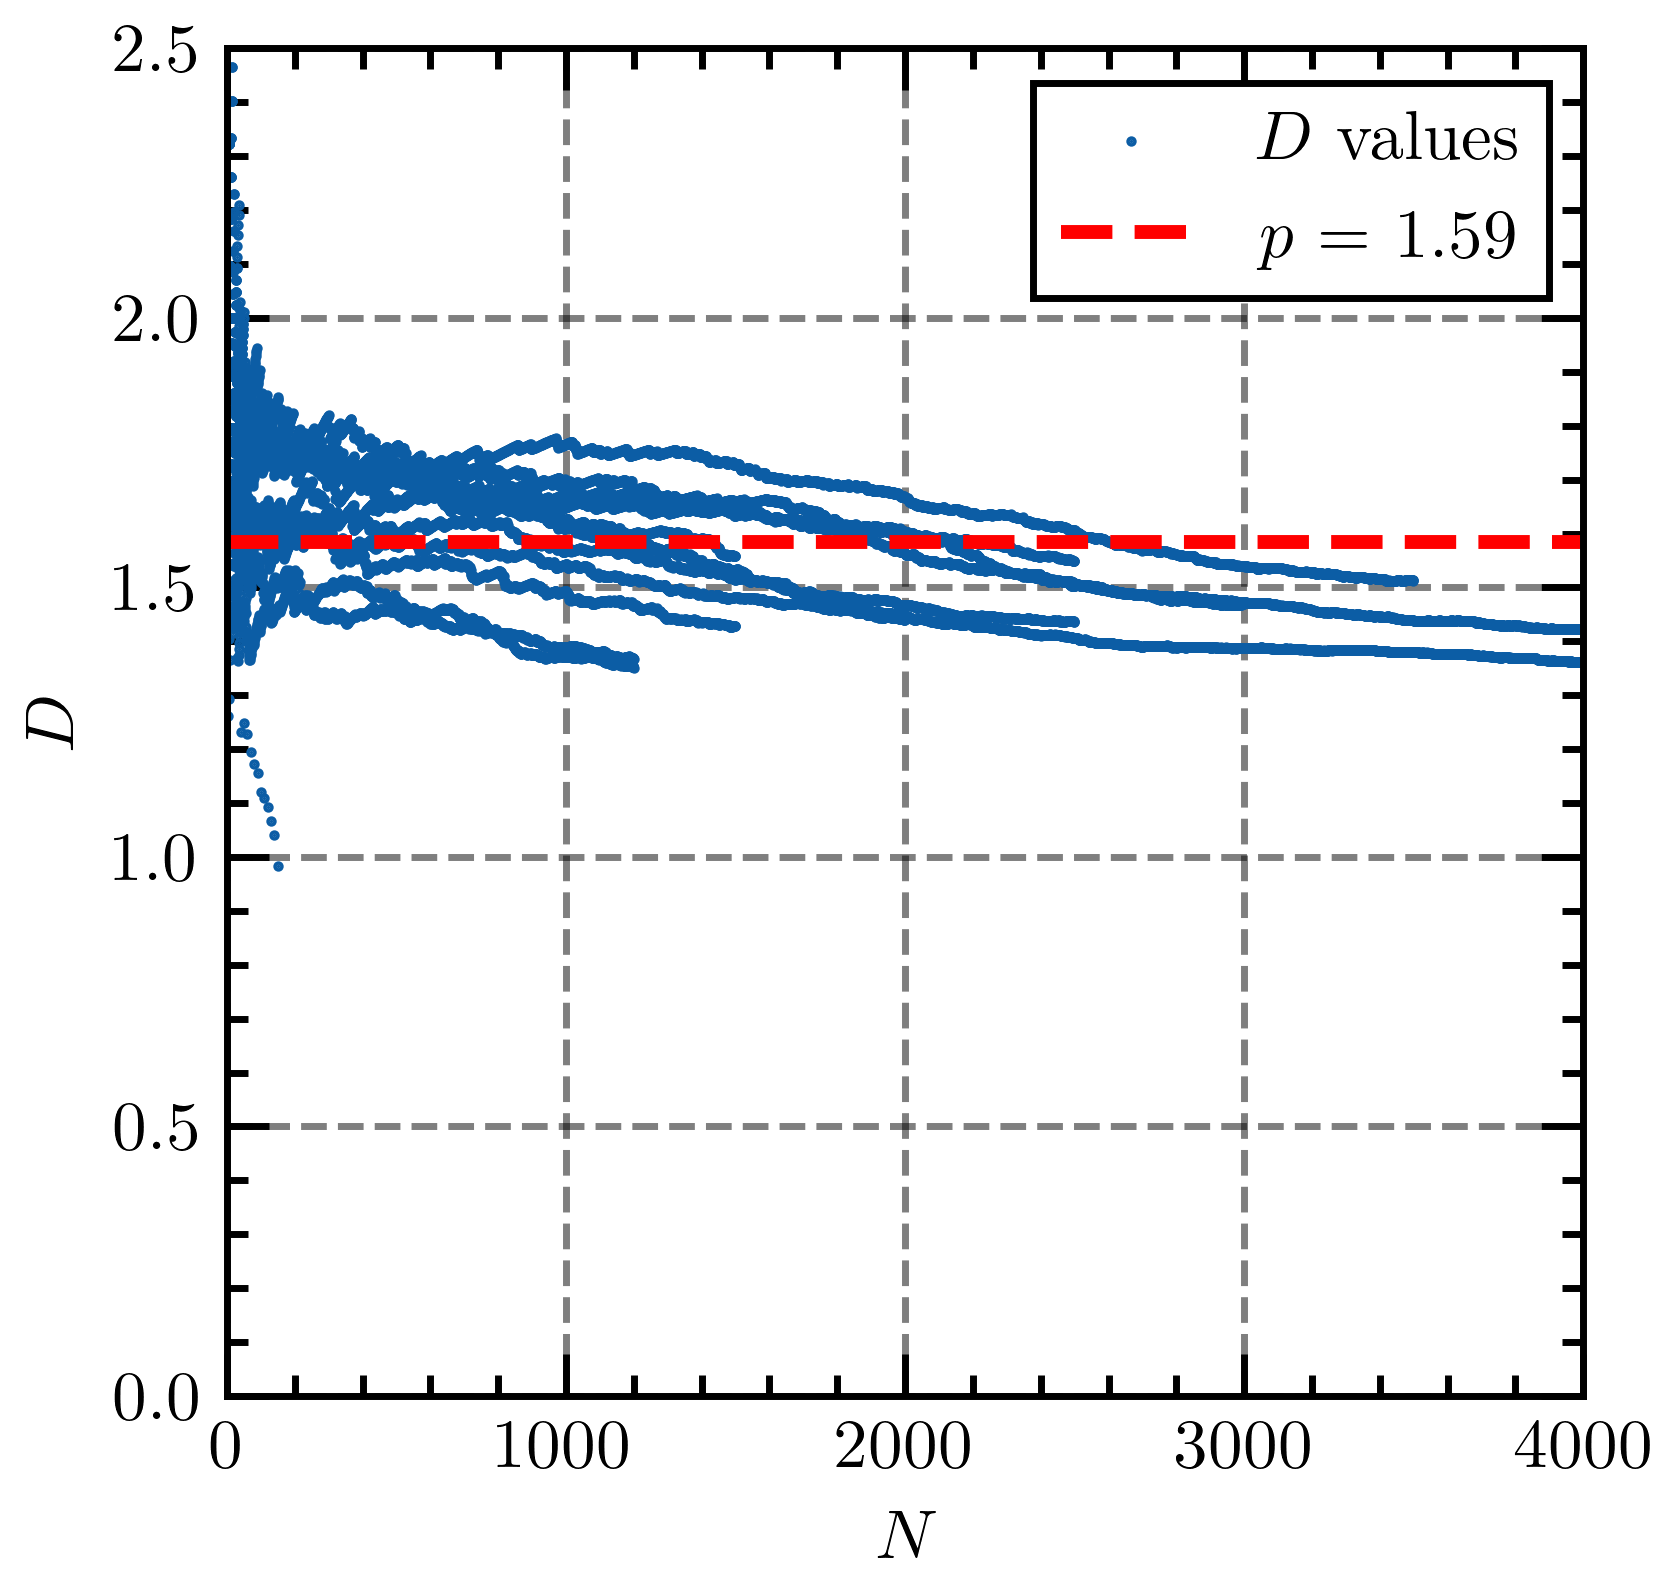

In [5]:
n_values = aggregate_file['n_values']
r_maxs = aggregate_file['r_max_vals']
D = np.log(n_values) / np.log(r_maxs)

p = np.mean(D[~np.isnan(D) & ~np.isinf(D)])
s = np.std(D[~np.isnan(D) & ~np.isinf(D)])
print(p,s)
plt.figure(figsize = (3.5,3.5), dpi = 500)
plt.scatter(n_values, D, marker = '.', s = 1, label = '$D$ values')
plt.axhline(p, linestyle="--", color='red', label=f"$p$ = {p:.2f}")
plt.xlabel(r'$N$')
# plt.xscale("log")
plt.ylabel(r'$D$')
plt.xlim(0,4000)
plt.ylim(0, 2.5)
plt.legend()
plt.savefig('aggregates.svg', format = 'svg')
plt.savefig('aggregates.png', format = 'png')
plt.show()

# plt.scatter(n_values, D, color = 'k', marker = '.')
# plt.xscale("log")
# plt.xlabel(r'$N$')
# plt.ylabel(r'$D$')
# plt.show()
